In [28]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

import math

In [29]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [30]:
dummies = pd.get_dummies(df['Car Model'], dtype=int)
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [31]:
merge = pd.concat([df,dummies],axis='columns')
merge

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [32]:
final = merge.drop(['Car Model'],axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [33]:
final2 = final.drop(['Audi A5'],axis='columns')
final2

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [34]:
x = final2.drop(['Sell Price($)'],axis='columns')
x

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [35]:
y = df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [36]:


from sklearn.linear_model import LinearRegression
model = LinearRegression()



In [37]:
model.fit(x,y)

LinearRegression()

In [38]:
model.score(x,y)

0.9417050937281082

In [39]:
model.predict([[45000,4,0,1]])

C:\Users\ICT\.anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [40]:
model.predict([[86000,7,1,0]])

C:\Users\ICT\.anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [41]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [42]:
left = df[df['left']==1]
left.shape

(3571, 10)

In [43]:
retained = df[df['left']==0]
retained.shape

(11428, 10)

In [44]:
l= df.drop(['Department'],axis='columns')
l

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,low
1,0.80,0.86,5,262,6,0,1,0,medium
2,0.11,0.88,7,272,4,0,1,0,medium
3,0.72,0.87,5,223,5,0,1,0,low
4,0.37,0.52,2,159,3,0,1,0,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low
14995,0.37,0.48,2,160,3,0,1,0,low
14996,0.37,0.53,2,143,3,0,1,0,low
14997,0.11,0.96,6,280,4,0,1,0,low


In [45]:
l1 = l.drop(['salary'],axis='columns')
l1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [46]:
grouped_data = l1.groupby(['left'])
grouped_data.first()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.58,0.74,4,215,3,0,0
1,0.38,0.53,2,157,3,0,0


In [47]:
grouped_data.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Text(0.5, 0, 'salary')

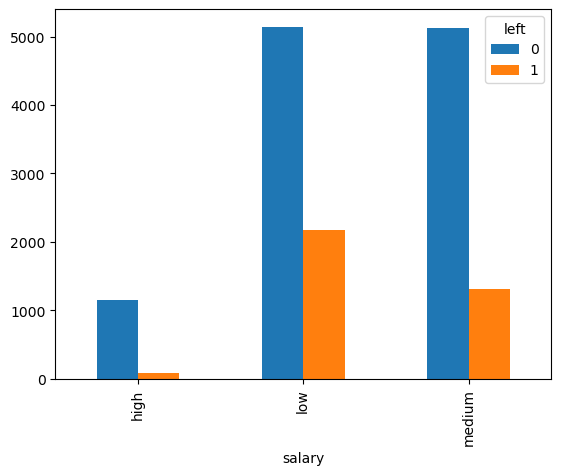

In [48]:
pd.crosstab(df.salary, df.left).plot(kind='bar', stacked=False)
 
plt.xlabel("salary") 

<Axes: xlabel='Department'>

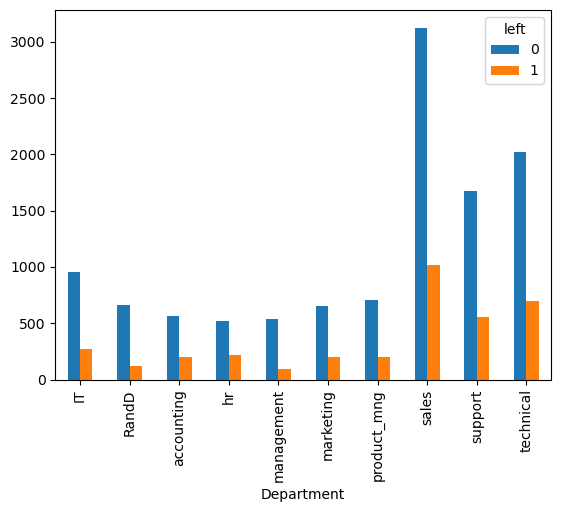

In [49]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [50]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [51]:
dummies = pd.get_dummies(subdf['salary'],dtype=int)
dummies.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [52]:
new = pd.concat([dummies,subdf],axis='columns')
new.head()

,high,low,medium,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0,1,0,0.38,157,0,low
1,0,0,1,0.80,262,0,medium
2,0,0,1,0.11,272,0,medium
3,0,1,0,0.72,223,0,low
4,0,1,0,0.37,159,0,low


In [53]:
drop = new.drop('salary',axis='columns')
drop.head()

,high,low,medium,satisfaction_level,average_montly_hours,promotion_last_5years
0,0,1,0,0.38,157,0
1,0,0,1,0.80,262,0
2,0,0,1,0.11,272,0
3,0,1,0,0.72,223,0
4,0,1,0,0.37,159,0


In [54]:
x = drop
x

,high,low,medium,satisfaction_level,average_montly_hours,promotion_last_5years
0,0,1,0,0.38,157,0
1,0,0,1,0.80,262,0
2,0,0,1,0.11,272,0
3,0,1,0,0.72,223,0
4,0,1,0,0.37,159,0
...,...,...,...,...,...,...
14994,0,1,0,0.40,151,0
14995,0,1,0,0.37,160,0
14996,0,1,0,0.37,143,0
14997,0,1,0,0.11,280,0


In [55]:
y = df['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [58]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [59]:
model.fit(x_train,y_train)

LogisticRegression()

In [60]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
model.score(x_test,y_test)

0.7824444444444445

In [62]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

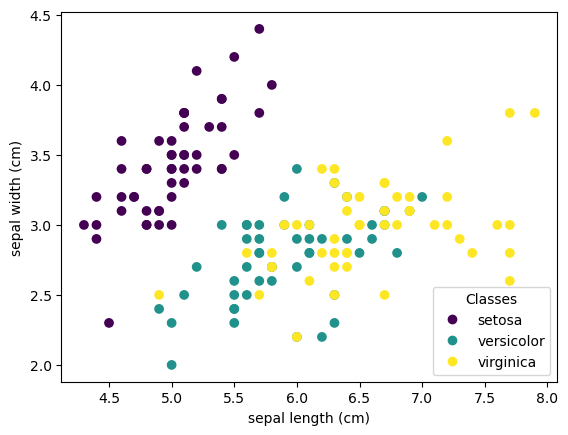

In [63]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.3)

In [67]:
model.fit(x_train, y_train)

LogisticRegression()

In [68]:
model.score(x_test,y_test)

0.9777777777777777

In [69]:
model.predict([[6.7, 3. , 5.2, 2.3]])

array([2])

In [70]:


y_predicted = model.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm



array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 19]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

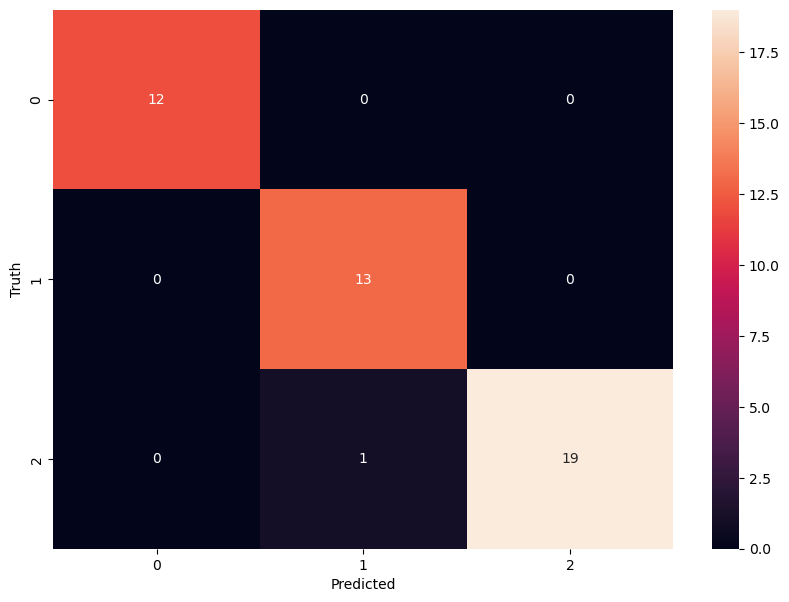

In [71]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [72]:
new_sample = np.array([[5.4, 3.4, 1.5, 0.4]])  # Replace with your own values
prediction = model.predict(new_sample)
predicted_class = iris.target_names[prediction]

print(f"\nPrediction for new sample: {predicted_class}")


Prediction for new sample: ['setosa']


In [73]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
x = df.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
x.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [75]:
y = df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [76]:
from sklearn.preprocessing import LabelEncoder
l_sex = LabelEncoder()

In [77]:
x['l_sex']=l_sex.fit_transform(x['Sex'])
x['l_sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: l_sex, dtype: int32

In [78]:
x

,Pclass,Sex,Age,Fare,l_sex
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1
...,...,...,...,...,...
886,2,male,27.0,13.0000,1
887,1,female,19.0,30.0000,0
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [79]:
new_x = x.drop(['Sex'],axis='columns')
new_x


,Pclass,Age,Fare,l_sex
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [80]:
new_x['Age'] = new_x.Age.fillna(new_x['Age'].mean())
new_x['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [81]:
new_x

,Pclass,Age,Fare,l_sex
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [82]:
from sklearn import tree
model = tree.DecisionTreeClassifier()


In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(new_x, y,test_size=0.3)

In [85]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [86]:
model.score(X_test,y_test)

0.7649253731343284

In [87]:
model.predict([[3,22.0,7.25,1]])

C:\Users\ICT\.anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [88]:
from sklearn.datasets import load_digits
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [89]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

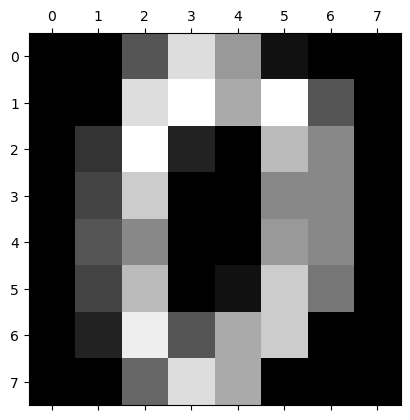

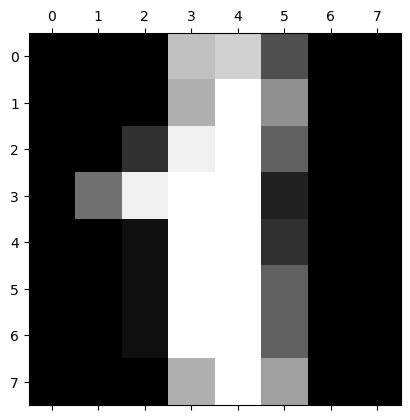

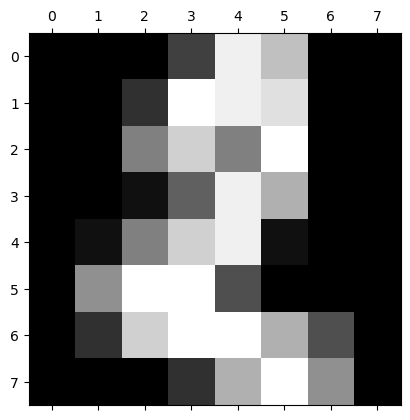

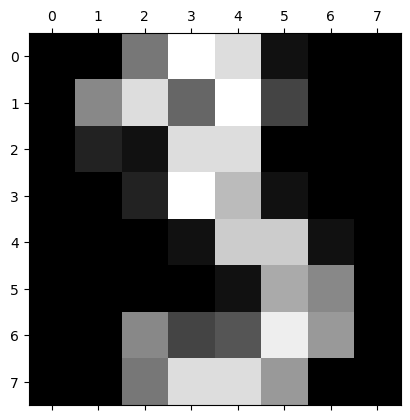

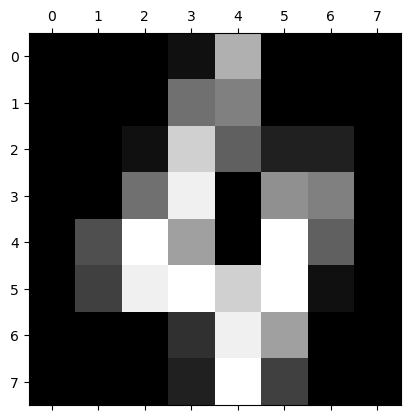

In [90]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [91]:
x = digits.data[:5]
x

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [92]:
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

ValueError: Found input variables with inconsistent numbers of samples: [5, 1797]

In [ ]:
from sklearn.svm import SVC
model = SVC(C=10)

In [ ]:
model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
model.predict(digits.data[0:5])

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris

In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

In [ ]:
df['target'] =iris.target
df['target']

In [ ]:
df

In [ ]:
x = df.drop(['target'],axis='columns')
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

In [ ]:
model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,y_predicted)
cm

In [ ]:
import seaborn as sn
plt.figure(figsize=(8,8))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()
iris

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.3)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
score_1 = cross_val_score(RandomForestClassifier(n_estimators=10),iris.data,iris.target,cv=10)
np.average(score_1)

In [ ]:
score_2 = cross_val_score(tree.DecisionTreeClassifier(),iris.data,iris.target,cv=10)
np.average(score_2)

In [ ]:
score_3 = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),iris.data,iris.target,cv=10)
np.average(score_3)

In [ ]:
score_4 = cross_val_score(SVC(gamma=10),iris.data,iris.target,cv=10)
np.average(score_4)

In [ ]:


from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf



In [ ]:
for train_index,test_index in kf.split(iris.data,iris.target):
    print(train_index,test_index)

In [ ]:
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_random = []
scores_svc = []



for train_index,test_index in folds.split(iris.data,iris.target):
    X_train,X_test,y_train,y_test = iris.data[train_index],iris.data[test_index],iris.target[train_index],iris.target[test_index]
    
    
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svc.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_random.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))
    
    
    
    
    

In [ ]:
np.average(scores_logistic)

In [ ]:
np.average(scores_random)

In [ ]:
np.average(scores_svc)

In [ ]:
skipped kmeans


In [ ]:
refevalCode = 1234
referalCode = int(input())
if referalCode==refevalCode:
    print('yufyff')
else:
    print('larry')

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()
wine

In [ ]:
df = pd.DataFrame(wine.data,columns = wine.feature_names)
df

In [ ]:
df['target']= wine.target
df

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=100)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()
mn.fit(X_train,y_train)
mn.score(X_test,y_test)

In [ ]:
model.predict([[14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0]])

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
dir(digits)

In [ ]:
digits

In [ ]:
plt.gray()
for i in digits.data:
    plt.matshow(digits.images[:5])

In [ ]:
df = pd.DataFrame(digits.data,columns= digits.feature_names)
df

In [ ]:
df['target'] = digits.target
df['target']

In [ ]:
df

In [ ]:
y = df['target']
x = df.drop(['target'],axis='columns',inplace=True)

In [ ]:
model_params={
    'svm':{
        'model':svm.SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'Random':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regresion':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    },
       'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    } 
}


In [ ]:
from sklearn.model_selection import GridSearchCV
scores = []
for model_names,mn in model_params.items():
    clf = GridSearchCV(mn['model'],mn['params'],cv=10,return_train_score=False)
    clf.fit(digits.data,digits.target)
    scores=({
        'model': model_names,
        'best_scores':clf.best_score_,
        'best_params':clf.best_params_
    })
df = pd.DataFrame(scores,columns=['model','best_scores','best_params']) 
df
    

In [ ]:
digits

In [ ]:
df = pd.DataFrame(digits.data,digits.target)
df.head()

In [ ]:
df['target'] = digits.target
df.head(20)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('target',axis='columns'), df.target,test_size=0.3,random_state=30)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
knn.score(X_test.values,y_test)

In [ ]:


from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test.values)
cm = confusion_matrix(y_test, y_pred)
cm



In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
model_params = {
    'knn':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[5,10,20]
        }
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
score=[]
for model_names ,mn in model_params.items():
    clf = GridSearchCV(mn['model'],mn['params'],cv=10,return_train_score=False)
    clf.fit(X_train.values,y_train)
    scores=({
        'model':model_names,
        'best_score':clf.best_score_,
        'best_param':clf.best_params_
    })
    
    
df = pd.DataFrame(scores,columns= ['model','best_score','best_param'])   
df

In [ ]:
df = pd.read_csv('heart.csv')
df

In [ ]:
df = pd.read_csv('height_weight.csv')
df

In [ ]:
plt.hist(df.height,bins=20,rwidth=0.8)
plt.xlabel('height')
plt.ylabel('count')
plt.show()

In [ ]:
plt.hist(df.weight,bins=20,rwidth=0.8)
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [ ]:
df.describe()

In [ ]:
new_df = df.drop(['weight'],axis='columns')
new_df

In [ ]:
Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)

In [ ]:
IQR = Q3-Q1
IQR

In [ ]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit,upper_limit

In [ ]:
df[(df.height<lower_limit)|(df.height>upper_limit)]

In [ ]:
with_no_outliers = df[(df.height>lower_limit)&(df.height<upper_limit)]
with_no_outliers

In [ ]:
df = pd.read_csv('bhp.csv')
df

In [ ]:
min_limit,max_limit = df['price_per_sqft'].quantile([0.001,0.999])
min_limit,max_limit

In [ ]:
df[(df.price_per_sqft<min_limit)|(df.price_per_sqft>max_limit)]

In [ ]:
new_df= df[(df.price_per_sqft>min_limit)&(df.price_per_sqft<max_limit)]
new_df

In [ ]:
df.describe()

In [ ]:
lower_bound = new_df.price_per_sqft -4*new_df.price_per_sqft.std()
upper_bound = new_df.price_per_sqft +4*new_df.price_per_sqft.std()
lower_bound,upper_bound

In [ ]:
new_df[(new_df.price_per_sqft>lower_bound)&(new_df.price_per_sqft<upper_bound)].shape

In [ ]:
df['zscore'] = (df.price_per_sqft-df.price_per_sqft.mean())/df.price_per_sqft.std()
df

In [ ]:
z = df[(df.zscore<-4)|(df.zscore>4)]
z

In [ ]:
z1 = df[(df.zscore>-4)&(df.zscore<4)]
z1.shape

In [ ]:
df = pd.read_csv('Homeprices_banglore.csv')
df.head(5)

In [ ]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [ ]:
scaled_y.reshape(20)

In [ ]:
np.random.permutation(20)

In [ ]:
def mini_batch_gradient_descent(x,y_true,epochs=100,batch_size=5,learning_rate=0.01):
    number_of_features = x.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    samples = x.shape[0]
    
    if batch_size > samples:
        batch_size = samples
        
    cost_list = []
    epoch_list = []
        
        
    batches = int(samples/batch_size)
        
    for i in range(epochs):
        
        random_indices = np.random.permutation(samples)
        x_tmp = x[random_indices]
        y_tmp = y_true[random_indices]
        
            
        for j in range(0,samples,batch_size):
            
            xj = x_tmp[j:j+batch_size] 
            yj = y_tmp[j:j+batch_size] 
                
            y_predicted = np.dot(w,xj.T) + b


            w_grad = -(2/len(xj))*(xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(xj))*np.sum(yj-y_predicted)

            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
            
            cost = np.mean(np.square(yj-y_predicted))
                
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
                
    return w,b,cost,cost_list,epoch_list
w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_x,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost                   

In [ ]:
def mini_batch_gradient_descent(x,y_true,epochs=100,batch_size=5,learning_rate=0.01):
    number_of_features = x.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    samples = x.shape[0]
    
    if batch_size > samples:
        batch_size = samples
        
    cost_list = []
    epoch_list = []
        
        
    batches = int(samples/batch_size)
        
    for i in range(epochs):
        
        random_indices = np.random.permutation(samples)
        x_tmp = x[random_indices]
        y_tmp = y_true[random_indices]
        
            
        for j in range(0,samples,batch_size):

            xj = x_tmp[j:j+batch_size] 
            yj = y_tmp[j:j+batch_size] 
                
            y_predicted = np.dot(w,xj.T) + b


            w_grad = -(2/len(xj))*(xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(xj))*np.sum(yj-y_predicted)

            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
            
            cost = np.mean(np.square(yj-y_predicted))
                
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
                
    return w,b,cost,cost_list,epoch_list
w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_x,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost                   

In [ ]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_x,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [95]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [105]:
cols= ['CustomerId','Surname']

for col in cols:
    df.drop(col,axis='columns',inplace=True)

In [106]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [107]:
def print_cols(dfs):
    for col in dfs:
        print(f'{col}:{df[col].unique()}')

In [108]:
print_cols(df)

CreditScore:[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 56

In [114]:
df['Gender'].replace({'Female':0,'Male':1},inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [120]:
df1 = pd.get_dummies(data = df,columns=['Geography'],dtype=int)
df1


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [125]:
cols2 = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
df1[cols2]=sx.fit_transform(df1[cols2])

In [129]:
df1.dtypes

CreditScore          float64
Gender                 int64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int32
Geography_Germany      int32
Geography_Spain        int32
dtype: object

In [130]:
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,0.332,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0
9997,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0
9998,0.844,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0


In [132]:
x = df1.drop('Exited',axis='columns')
y = df1['Exited'].astype(np.float32)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [133]:
y.value_counts()

Exited
0.0    7963
1.0    2037
Name: count, dtype: int64

In [134]:
X_train.shape

(623, 4)

In [136]:
X_test.shape

(268, 4)

In [137]:
X_train[:10]

,Pclass,Age,Fare,l_sex
634,3,9.000000,27.9000,0
848,2,28.000000,33.0000,1
556,1,48.000000,39.6000,0
677,3,18.000000,9.8417,0
604,1,35.000000,26.5500,1
527,1,29.699118,221.7792,1
509,3,26.000000,56.4958,1
242,2,29.000000,10.5000,1
442,3,25.000000,7.7750,1
395,3,22.000000,7.7958,1


In [1]:
import tensorflow

ModuleNotFoundError: No module named 'tensorflow'